In [0]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1.dcm to 1.dcm
User uploaded file "1.dcm" with length 527062 bytes


In [0]:
im = imageio.imread('1.dcm')

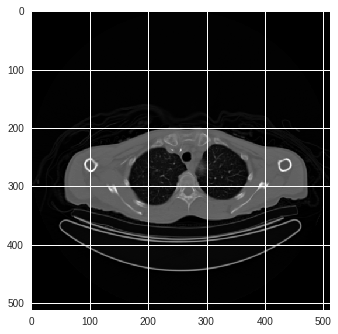

In [8]:
plt.imshow(im, cmap='gray')


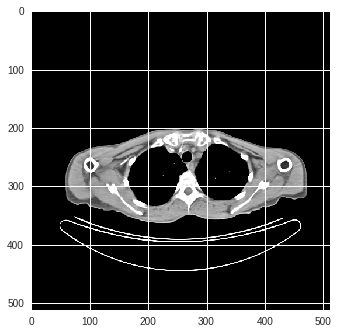

In [9]:
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)


In [10]:
#upload chest ct scan images
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving chest-220.dcm to chest-220.dcm
Saving chest-221.dcm to chest-221.dcm
Saving chest-222.dcm to chest-222.dcm
Saving chest-224.dcm to chest-224.dcm
Saving chest-225.dcm to chest-225.dcm
User uploaded file "chest-220.dcm" with length 526682 bytes
User uploaded file "chest-221.dcm" with length 526682 bytes
User uploaded file "chest-222.dcm" with length 526682 bytes
User uploaded file "chest-224.dcm" with length 526682 bytes
User uploaded file "chest-225.dcm" with length 526678 bytes


In [12]:

# Read in each 2D image
im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
im3 = imageio.imread('chest-222.dcm')
im4 = imageio.imread('chest-224.dcm')
im5 = imageio.imread('chest-225.dcm')
# Stack images into a volume
vol = np.stack([im1,im2,im3,im4,im5])
print('Volume dimensions:', vol.shape)

Volume dimensions: (5, 512, 512)


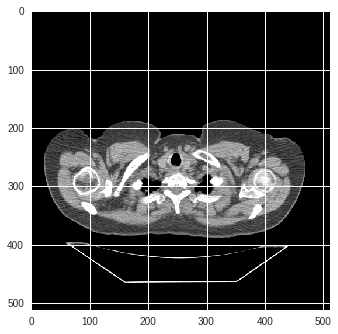

In [13]:
plt.imshow(im1, cmap='gray', vmin=-200, vmax=200)


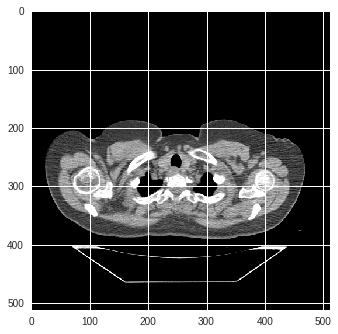

In [14]:
plt.imshow(im2, cmap='gray', vmin=-200, vmax=200)


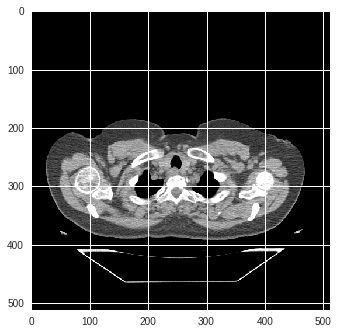

In [15]:
plt.imshow(im3, cmap='gray', vmin=-200, vmax=200)


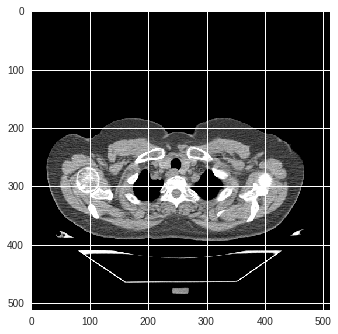

In [16]:
plt.imshow(im4, cmap='gray', vmin=-200, vmax=200)


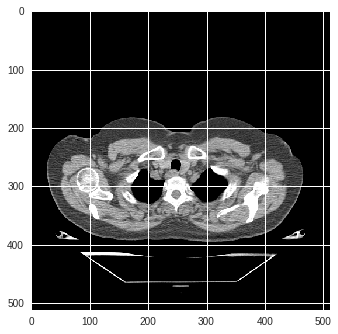

In [17]:
plt.imshow(im5, cmap='gray', vmin=-200, vmax=200)


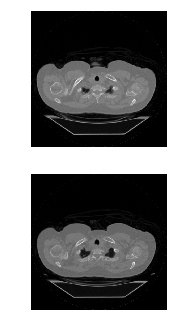

In [18]:


# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')


# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [0]:
#intensity analysis

In [19]:
#upload chest ct scan images
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hand.png to hand.png
User uploaded file "hand.png" with length 72262 bytes


In [0]:
im = imageio.imread('hand.png')


Data type: uint8
Min. value: <built-in method min of Array object at 0x7fd8e9a56208>
Max value: <built-in method max of Array object at 0x7fd8e9a56208>


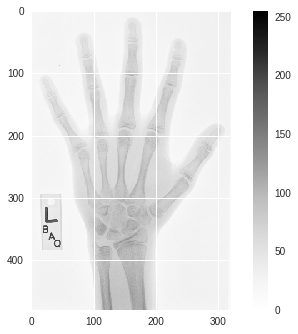

In [21]:
print('Data type:', im.dtype)
print('Min. value:', im.min)
print('Max value:', im.max)

# Plot the grayscale image
plt.imshow(im,vmin=0, vmax=255)
plt.colorbar()


In [0]:
import scipy.ndimage as ndi

In [0]:
hist = ndi.histogram(im, min=0,max=255,bins=256)

In [0]:
cdf = hist.cumsum()/hist.sum()

In [25]:
cdf.shape

(256,)

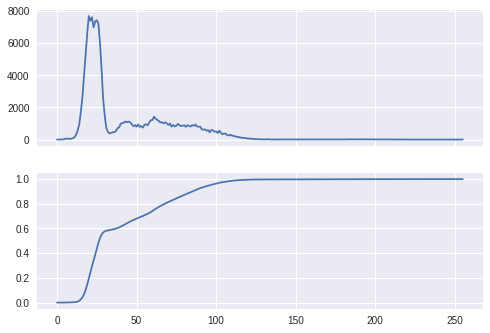

In [26]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')


Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

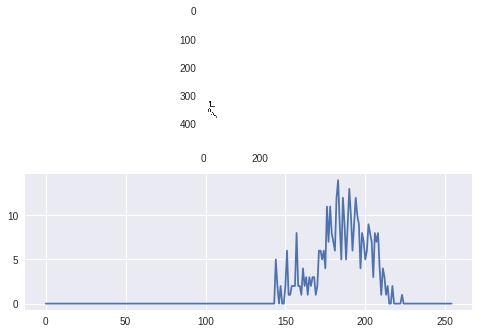

In [27]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone)
axes[1].plot(hist)


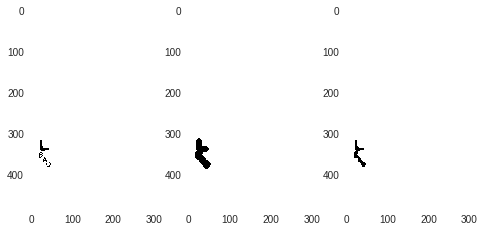

In [28]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
 

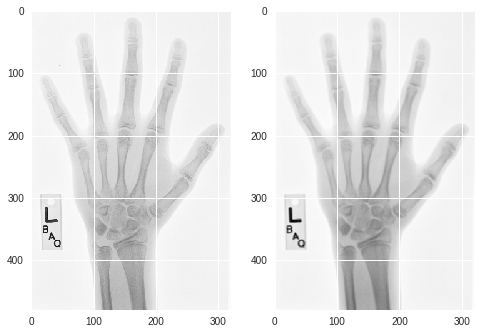

In [29]:
 # Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)
 

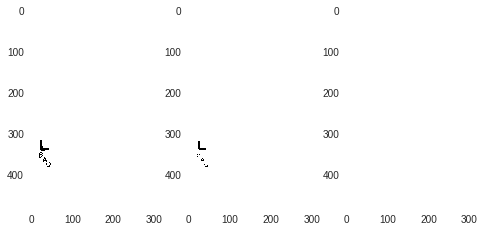

In [30]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1 >= 145)
axes[2].imshow(im_s3 >= 145)
 

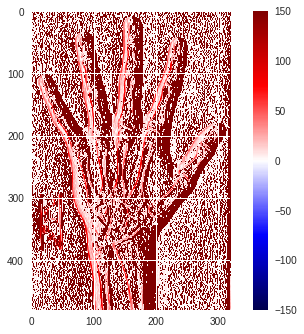

In [31]:
# Set weights to detect vertical edges
weights = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im,weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
 

In [34]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SCD2001_MR_117.dcm to SCD2001_MR_117.dcm
User uploaded file "SCD2001_MR_117.dcm" with length 133200 bytes


In [0]:
ima=imageio.imread('SCD2001_MR_117.dcm')

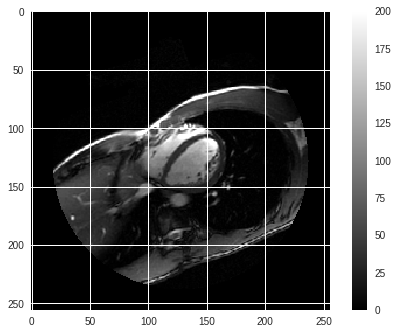

In [40]:
plt.imshow(ima, cmap='gray', vmin=0, vmax=200)
plt.colorbar()

In [41]:
# Smooth intensity values
im_filt = ndi.median_filter(ima, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

Num. Labels: 26


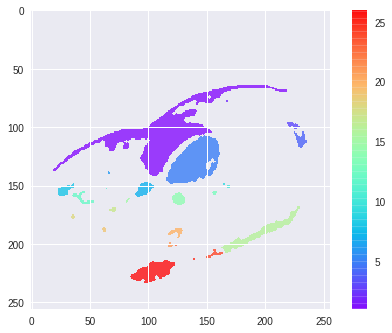

In [43]:
# Create a `labels` overlay
overlay = np.where(labels>0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=0.75)
plt.colorbar()

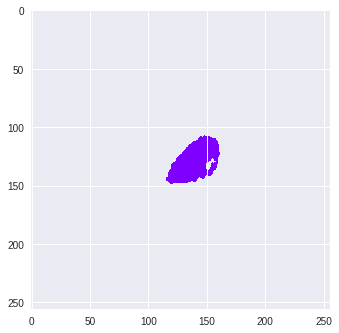

In [44]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

When running ndi.label(), the image is traversed from top-left to bottom right, so the generated label value could change depending on how many objects are detected. You may need to plot your labeled image to get the appropriate region.

Number of objects: 1
Indices for first box: (slice(107, 149, None), slice(116, 162, None))


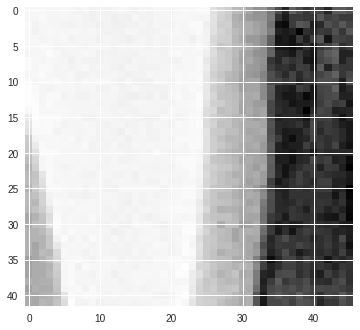

In [46]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv)
 